In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import numpy as np
import pandas as pd

np.random.seed(42)
x1 = np.random.normal(loc=3, scale=1, size=100)

x2 = 2 * x1 + np.random.normal(scale=0.5, size=100)
x3 = -0.5 * x1 + np.random.normal(scale=0.5, size=100)
x4 = 3 * x1 + 2 * np.random.normal(scale=0.5, size=100)
x5 = 4 + 1.5 * x1 + np.random.normal(scale=0.5, size=100)
x6 = -x1 + np.random.normal(scale=0.5, size=100)

x7 = 0.3 * x1 + 0.4 * x2
x8 = -0.2 * x3 + 0.5 * x4
x9 = x5 - 0.8 * x6
x10 = 2 * x1 + 0.5 * x3 - 1.5 * x4


training_data = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'X3': x3,
    'X4': x4,
    'X5': x5,
    'X6': x6,
    'X7': x7,
    'X8': x8,
    'X9': x9,
    'X10': x10
})

print(training_data.head())


         X1        X2        X3         X4         X5        X6        X7  \
0  3.496714  6.285743 -1.569463   9.661147   8.447857 -3.033625  3.563311   
1  2.861736  5.513149 -1.150476   8.025026   7.992916 -1.907027  3.063780   
2  3.647689  7.124020 -1.282319  11.690359   9.474155 -4.346972  3.943914   
3  4.523030  8.644921 -1.734614  14.179460  10.808035 -4.241545  4.814877   
4  2.765847  5.451050 -2.071758   8.276638   7.923737 -3.091168  3.010174   

         X8         X9        X10  
0  5.144466  10.874758  -8.283025  
1  4.242608   9.518538  -6.889305  
2  6.101643  12.951733 -10.881321  
3  7.436653  14.201271 -13.090437  
4  4.552671  10.396672  -7.919143  


<Axes: >

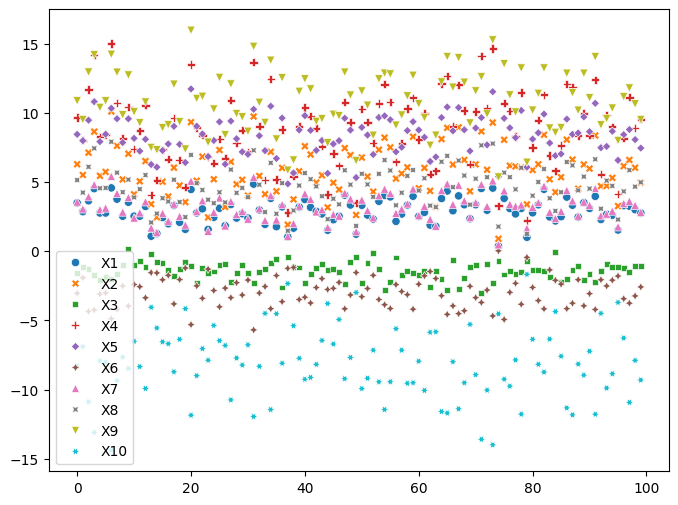

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = training_data)

In [30]:
sigma = training_data.cov()

In [31]:
sigma

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,0.824770,1.590463,-0.318424,2.337632,1.171373,-0.888712,0.883616,1.232501,1.882343,-2.016121
X2,1.590463,3.290142,-0.616779,4.490608,2.302513,-1.746922,1.793196,2.368660,3.700051,-3.863377
X3,-0.318424,-0.616779,0.406149,-0.887057,-0.475333,0.312334,-0.342239,-0.524758,-0.725201,0.896812
X4,2.337632,4.490608,-0.887057,7.384500,3.409850,-2.499826,2.497533,3.869661,5.409712,-6.845014
X5,1.171373,2.302513,-0.475333,3.409850,1.941268,-1.289155,1.272417,1.799992,2.972592,-3.009696
X6,-0.888712,-1.746922,0.312334,-2.499826,-1.289155,1.165885,-0.965383,-1.312380,-2.221862,2.128482
X7,0.883616,1.793196,-0.342239,2.497533,1.272417,-0.965383,0.982363,1.317214,2.044723,-2.150187
X8,1.232501,2.368660,-0.524758,3.869661,1.799992,-1.312380,1.317214,2.039782,2.849896,-3.601869
X9,1.882343,3.700051,-0.725201,5.409712,2.972592,-2.221862,2.044723,2.849896,4.750082,-4.712482
X10,-2.016121,-3.863377,0.896812,-6.845014,-3.009696,2.128482,-2.150187,-3.601869,-4.712482,6.683686


In [32]:
factorize_sigma = np.linalg.svd(sigma)
factorize_sigma

SVDResult(U=array([[-0.16870555, -0.12389992,  0.16619754,  0.00405483, -0.01555532,
        -0.58176586, -0.56845597,  0.26078126, -0.34439882, -0.28301255],
       [-0.32949147, -0.34987143,  0.65148777, -0.03848884,  0.17200444,
         0.42424081,  0.13876545,  0.00228631, -0.08075083, -0.32826831],
       [ 0.06814033, -0.00593771, -0.06311665,  0.91716539,  0.28187641,
         0.13892757, -0.19291868, -0.10776269, -0.02564328, -0.04361662],
       [-0.51780507,  0.254734  ,  0.11019104,  0.25667014,  0.03848187,
        -0.43325108,  0.56636295,  0.23702341,  0.09958767,  0.11364296],
       [-0.25230261, -0.2502013 , -0.41127237, -0.17692322,  0.54264355,
        -0.00678293, -0.13876522,  0.19773746,  0.53373355, -0.18857488],
       [ 0.18545797,  0.26691496,  0.09175452, -0.22408328,  0.76288263,
        -0.10637382,  0.11101218, -0.15818997, -0.42698684,  0.15085991],
       [-0.18240825, -0.17711855,  0.31045437, -0.01417909,  0.06413518,
        -0.00483343, -0.34691363,

In [33]:
factorize_sigma = np.linalg.svd(training_data - training_data.mean(), full_matrices=False)
Q_transpose = factorize_sigma[0]
Q = Q_transpose.T

# Step 2: Convert the training data and its centered version to numpy arrays
X_transpose = np.array(training_data)
X_bar_transpose = np.array(training_data - training_data.mean())
X_bar = X_bar_transpose.T  # X_bar is now the mean-centered data

# Step 3: Calculate the covariance matrix (sigma)
n_train = training_data.shape[0]  # Number of training samples
sigma = (1 / n_train) * np.matmul(X_bar, X_bar_transpose)

# Display results
print("Covariance Matrix (sigma):\n", sigma)

Covariance Matrix (sigma):
 [[ 0.81652219  1.57455806 -0.31523958  2.314256    1.15965948 -0.87982508
   0.87477988  1.22017591  1.86351955 -1.9959594 ]
 [ 1.57455806  3.25724089 -0.61061104  4.44570223  2.27948824 -1.72945309
   1.77526378  2.34497332  3.66305072 -3.82474274]
 [-0.31523958 -0.61061104  0.4020872  -0.87818638 -0.47057972  0.30921109
  -0.33881629 -0.51951063 -0.71794859  0.88784401]
 [ 2.314256    4.44570223 -0.87818638  7.31065518  3.37575196 -2.47482809
   2.47255769  3.83096487  5.35561444 -6.77656397]
 [ 1.15965948  2.27948824 -0.47057972  3.37575196  1.92185526 -1.276263
   1.25969314  1.78199192  2.94286566 -2.97959883]
 [-0.87982508 -1.72945309  0.30921109 -2.47482809 -1.276263    1.15422608
  -0.95572876 -1.29925627 -2.19964386  2.10719752]
 [ 0.87477988  1.77526378 -0.33881629  2.47255769  1.25969314 -0.95572876
   0.97253948  1.3040421   2.02427615 -2.12868492]
 [ 1.22017591  2.34497332 -0.51951063  3.83096487  1.78199192 -1.29925627
   1.3040421   2.01938456

In [34]:
z = np.matmul(Q.T, X_bar)
z

array([[ 0.28069591,  0.05420584,  0.11228496, ...,  0.31039884,
         0.08652439,  0.43420061],
       [ 0.10956933, -0.47729852,  0.81885472, ...,  0.71542155,
         0.02283647,  0.12373398],
       [ 0.09471663, -0.27942486,  0.79048885, ...,  0.49966588,
        -0.00636261, -0.13463718],
       ...,
       [-0.04101058,  0.2106117 , -0.32036742, ..., -0.21491705,
        -0.03946265,  0.09695437],
       [ 0.14583189, -0.21734646,  0.5980729 , ...,  0.44794514,
        -0.01072856, -0.03797636],
       [ 0.13650163, -0.46051688,  0.97658105, ...,  0.69408743,
        -0.0356198 , -0.00113721]], shape=(100, 100))

In [35]:
projected_training_data = pd.DataFrame(data=z.T[:, :10], columns = ["Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10"])
projected_training_data


,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
0,0.280696,0.109569,0.094717,-0.100133,0.055696,-0.115992,-0.181633,-0.046152,0.077592,0.187656
1,0.054206,-0.477299,-0.279425,-0.166800,-0.128073,0.355521,0.412923,0.181879,-0.073043,0.228607
2,0.112285,0.818855,0.790489,0.111208,0.323879,-0.798860,-0.940252,-0.403254,0.230999,-0.067537
3,0.410335,1.249802,1.369506,-0.086460,0.635121,-1.382391,-1.278463,-0.698720,0.397987,-0.019379
4,0.105536,0.070983,-0.195042,0.019754,-0.071915,0.018500,0.179193,-0.015119,-0.048234,-0.112377
...,...,...,...,...,...,...,...,...,...,...
95,-0.545166,-1.142247,-1.089074,0.073925,-0.465744,1.229427,1.021308,0.629685,-0.308078,-0.095102
96,-0.185459,-0.218073,-0.032630,0.047687,0.145089,0.416184,-0.434300,0.375987,0.105788,0.117758
97,0.310399,0.715422,0.499666,0.048088,0.103567,-0.772954,-0.410752,-0.474384,0.094726,-0.019730
98,0.086524,0.022836,-0.006363,0.034541,-0.020304,0.033958,-0.156034,0.053875,0.017655,0.164951


In [36]:
eigen_values = factorize_sigma[1]
total = np.sum(eigen_values)

var_sum = 0
pvp = 0.6

for i in range(eigen_values.shape[0]):
    if (var_sum/total) > pvp:
        break
    var_sum += eigen_values[i]
    val = i

projected_final = projected_training_data.iloc[:,0:(val-1)]
projected_final

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9
0,0.280696,0.109569,0.094717,-0.100133,0.055696,-0.115992,-0.181633,-0.046152,0.077592
1,0.054206,-0.477299,-0.279425,-0.166800,-0.128073,0.355521,0.412923,0.181879,-0.073043
2,0.112285,0.818855,0.790489,0.111208,0.323879,-0.798860,-0.940252,-0.403254,0.230999
3,0.410335,1.249802,1.369506,-0.086460,0.635121,-1.382391,-1.278463,-0.698720,0.397987
4,0.105536,0.070983,-0.195042,0.019754,-0.071915,0.018500,0.179193,-0.015119,-0.048234
...,...,...,...,...,...,...,...,...,...
95,-0.545166,-1.142247,-1.089074,0.073925,-0.465744,1.229427,1.021308,0.629685,-0.308078
96,-0.185459,-0.218073,-0.032630,0.047687,0.145089,0.416184,-0.434300,0.375987,0.105788
97,0.310399,0.715422,0.499666,0.048088,0.103567,-0.772954,-0.410752,-0.474384,0.094726
98,0.086524,0.022836,-0.006363,0.034541,-0.020304,0.033958,-0.156034,0.053875,0.017655


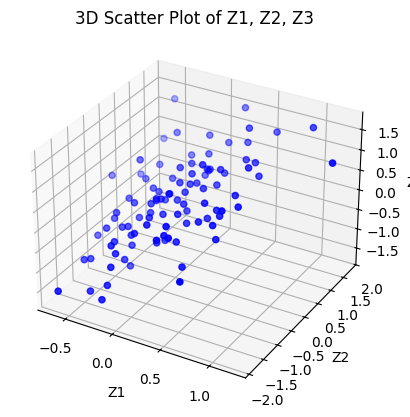

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(projected_final['Z1'], projected_final['Z2'], projected_final['Z3'], color='b', marker='o')

# Labels
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

# Show plot
plt.title("3D Scatter Plot of Z1, Z2, Z3")
plt.show()

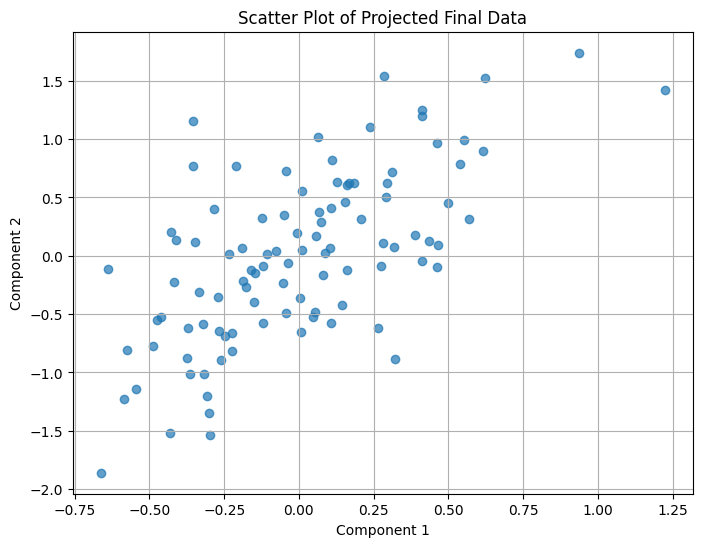

In [38]:
# Check if projected_final has more than one column
if projected_final.shape[1] >= 2:
    # Create scatter plot for the first two components
    plt.figure(figsize=(8, 6))
    plt.scatter(projected_final.iloc[:, 0], projected_final.iloc[:, 1], alpha=0.7)
    plt.title('Scatter Plot of Projected Final Data')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()
else:
    print("Not enough components for a 2D scatter plot.")
